In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns # for visualisation  
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier  
from sklearn.model_selection import train_test_split # Import train_test_split function  
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation  
from sklearn.linear_model import LogisticRegression #Import logistic regression module  
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, roc_auc_score  
# for precision,recall and F1 score calculations  
from sklearn import tree  
from sklearn import preprocessing   
import matplotlib.pyplot as plt # for visualisation  
from sklearn.preprocessing import StandardScaler  
from sklearn.decomposition import PCA   # for PCA  
from sklearn.ensemble import RandomForestClassifier  
import datetime  
%matplotlib inline  


In [2]:
#Reading the data into a Data dataframe object  
Data=pd.read_excel("Satisfaction Survey.xlsx")  


In [3]:
# Exploratory data  
Data.describe()  
 
Data.head()


,Satisfaction,Airline Status,Age,Age Range,Gender,Price Sensitivity,Year of First Flight,No of Flights p.a.,No of Flights p.a. grouped,% of Flight with other Airlines,...,Origin State,Destination City,Destination State,Scheduled Departure Hour,Departure Delay in Minutes,Arrival Delay in Minutes,Flight cancelled,Flight time in minutes,Flight Distance,Arrival Delay greater 5 Mins
0,4.5,Blue,31,30-39,Male,1,2007,27.545328,21 to 30,7,...,Wisconsin,"Dallas/Fort Worth, TX",Texas,15,0.0,3.0,No,134.0,821,no
1,4,Blue,56,50-59,Male,2,2006,40.655509,41 to 50,3,...,Wisconsin,"Dallas/Fort Worth, TX",Texas,11,2.0,5.0,No,120.0,821,no
2,2.5,Blue,21,20-29,Female,2,2006,8.368201,1 to 10,7,...,Wisconsin,"Dallas/Fort Worth, TX",Texas,12,34.0,14.0,No,122.0,853,yes
3,4,Blue,43,40-49,Male,1,2007,8.716876,1 to 10,9,...,Wisconsin,"Dallas/Fort Worth, TX",Texas,11,26.0,39.0,No,141.0,821,yes
4,5,Silver,49,40-49,Male,1,2006,13.598326,11 to 20,10,...,Wisconsin,"Dallas/Fort Worth, TX",Texas,12,0.0,0.0,No,144.0,853,no


Text(0, 0.5, 'Frequency')

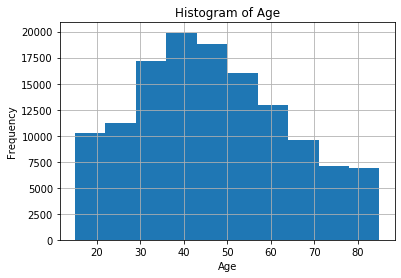

In [4]:
Data.Age.hist()  
plt.title('Histogram of Age')  
plt.xlabel('Age')  
plt.ylabel('Frequency')  

# From the histogram age group from 40-50 is the highest  

Text(0, 0.5, 'Count')

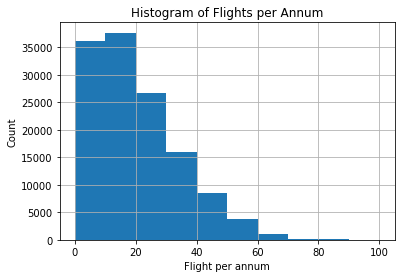

In [5]:
Data['No of Flights p.a.'].hist()  
plt.title('Histogram of Flights per Annum')  
plt.xlabel('Flight per annum')  
plt.ylabel('Count')  
# The histogram shows 10-20 range is the highest flights taken in a year  


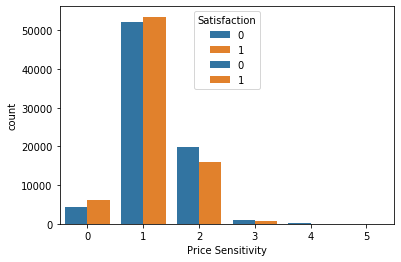

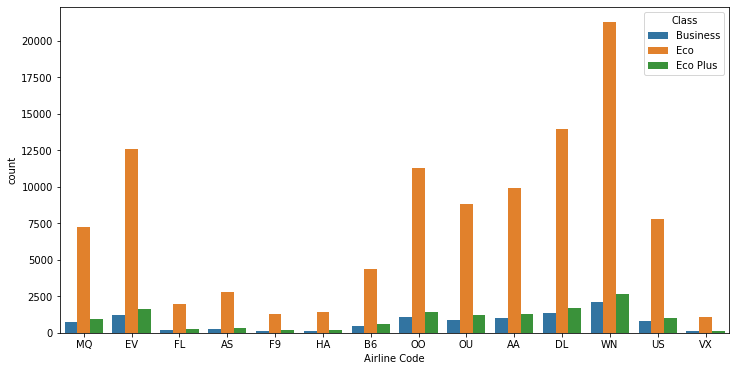

In [6]:
# Removing incorrect Satisfaction values. From the above graph satisfaction rating is integer only  
incorrect_data = Data['Satisfaction'].astype(str).str.len() > 1  
Data_corrected = Data[~incorrect_data]  
Data=Data_corrected.drop_duplicates(keep='first')  
  
# Converting Satisfaction(class variable) to a binary column  
# We make the satifaction category as a rating equal to and higher than 3, lower than 3 are considered as unsatisfied  
Data['Satisfaction'] = np.where(Data['Satisfaction'].astype(str).astype(float) > 3,1,0)  

# Exploratory graphs  
g=sns.countplot(x='Class',data = Data,hue='Satisfaction')  
 
g=sns.countplot(x='Price Sensitivity',data = Data,hue = 'Satisfaction')  

fig = plt.figure(figsize=(12,6))  
g=sns.countplot(x='Airline Code',data = Data,hue='Class')  
plt.show() 


<Figure size 432x288 with 0 Axes>

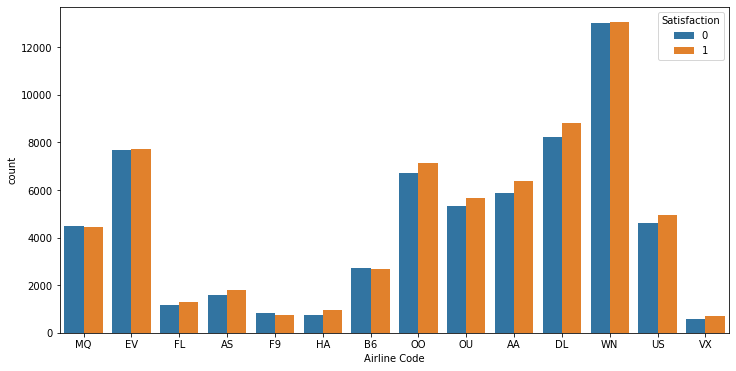

<Figure size 432x288 with 0 Axes>

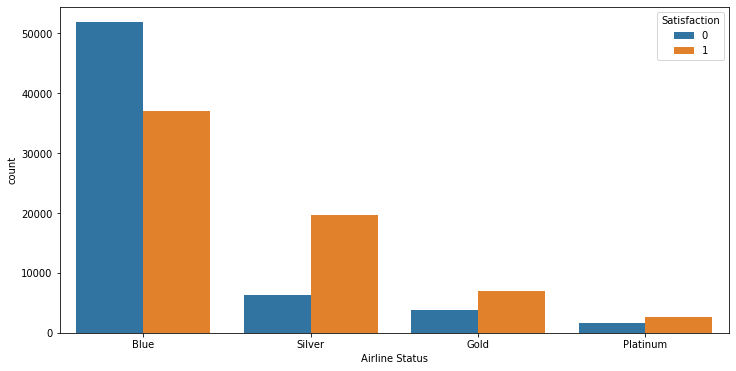

<Figure size 432x288 with 0 Axes>

In [7]:
# Clearly Economy class has the maximum passengers  
plt.savefig("Airline_vs_Class")  
 
fig = plt.figure(figsize=(12,6))  
g=sns.countplot(x='Airline Code',data = Data,hue='Satisfaction')  
plt.show()  
# Airline having code WN(Cheapest Airlines) has the maximum number of Satisfied and unsatisfied customers  
plt.savefig("_Satisfaction_per_Airline")  
 
fig = plt.figure(figsize=(12,6))  
g=sns.countplot(x='Airline Status',data = Data,hue='Satisfaction')  
plt.show()  
# Airline having code WN(Cheapest Airlines) has the maximum number of Satisfied and unsatisfied customers  
plt.savefig("_Satisfaction_per_Airline")  



In [8]:
# Data cleaning  
 
# No of flights taken per annum cannot be in decimals  
Data['No of Flights p.a.']=round(Data['No of Flights p.a.'],0)  
# Number of flights in a year should not be zero if a person is giving a satisfaction rating. This can be due incorrect data entry  
# We will be replacing such entries with nan and then replacing them with values by the machine learning algorithm  
col=['No of Flights p.a.']  
Data[col]=Data[col].replace(0,np.nan)  

# Making the airline status into dummy columns. The original categories were Blue,Gold,SIlver and Platinum  
Data = pd.get_dummies(Data, columns=["Airline Status"])  
Data = pd.get_dummies(Data, columns=["Type of Travel"])  
Data = pd.get_dummies(Data, columns=["Class"])  
Data = pd.get_dummies(Data, columns=["Airline Code"])  

# Making gender column as binary  
Gender_Replace = {'Gender':{'Male':1,'Female':0}}  
Data.replace(Gender_Replace, inplace= True)  

# Making flight cancelled as a binary column  
Flight_cancelled = {'Flight cancelled':{'Yes':1,'No':0}}  
Data.replace(Flight_cancelled, inplace= True)  

# Making Arrival delay greater than 5 mins to a  categorical column  
Arrival_Delay = {'Arrival Delay greater 5 Mins':{'yes':1,'no':0}}  
Data.replace(Arrival_Delay, inplace= True)  



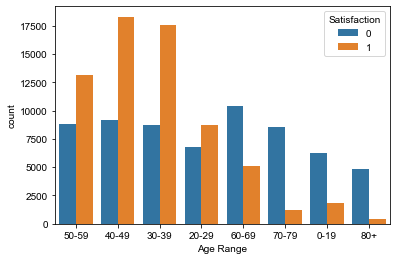

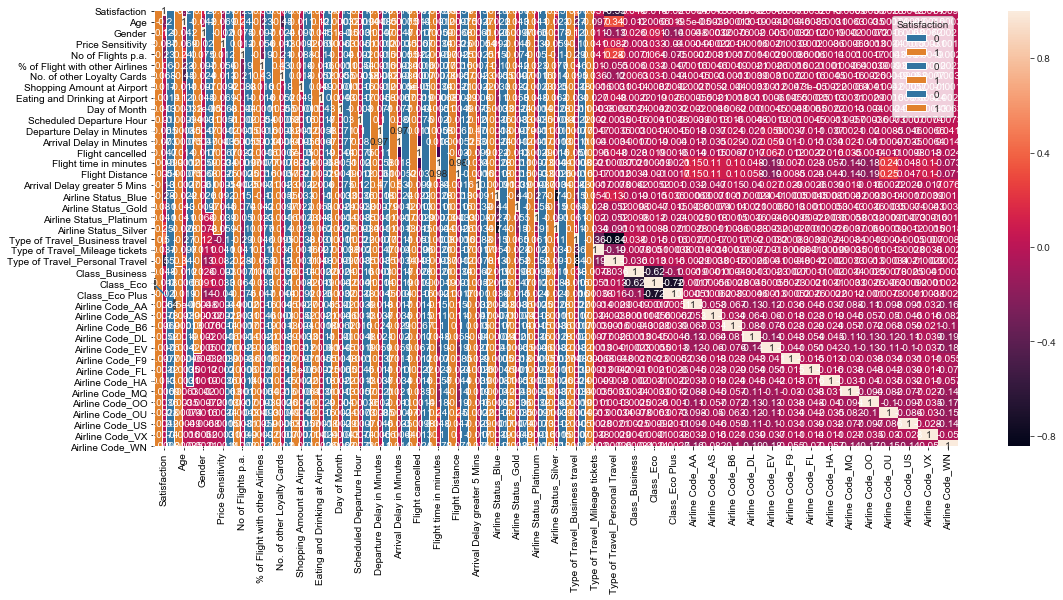

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x='Age Range',data = Data,hue='Satisfaction')  

# Finding the number on na values in each column  
len(Data) - Data[Data.columns].count()  

# visualising na values in columns  
plt.figure(figsize=(18,8))  
sns.heatmap(Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')  

# The yellow marks represent the missing values.   
# The columns with missing values are No Of Flights p.a,Departure Delay in Min, Arrival delay in Mins and flight time in mins  

# dropping grouped columns and flight date as we are doing an anlysis from 2003-2012. The business sense allows us to drop these columns  
Data.drop(['Age Range','Year of First Flight','No of Flights p.a. grouped',  
          'Flight date','Airline Name','Orgin City','Origin State','Destination City','Destination State'],axis = 1,inplace = True)  
 
sns.lineplot(y='Shopping Amount at Airport',data = Data,x= 'Satisfaction')  

sns.barplot(x= 'Satisfaction',y='Shopping Amount at Airport',data = Data)  
 
sns.set_style('whitegrid')  
sns.countplot(x='Satisfaction',data = Data)  
 
sns.countplot(x='Satisfaction',data = Data,hue='Gender')  
  
sns.countplot(x='Gender' ,data = Data,hue='Satisfaction')  

sns.countplot(x='Scheduled Departure Hour',data = Data,hue='Satisfaction')  



C:\Users\ARORA\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ARORA\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ARORA\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

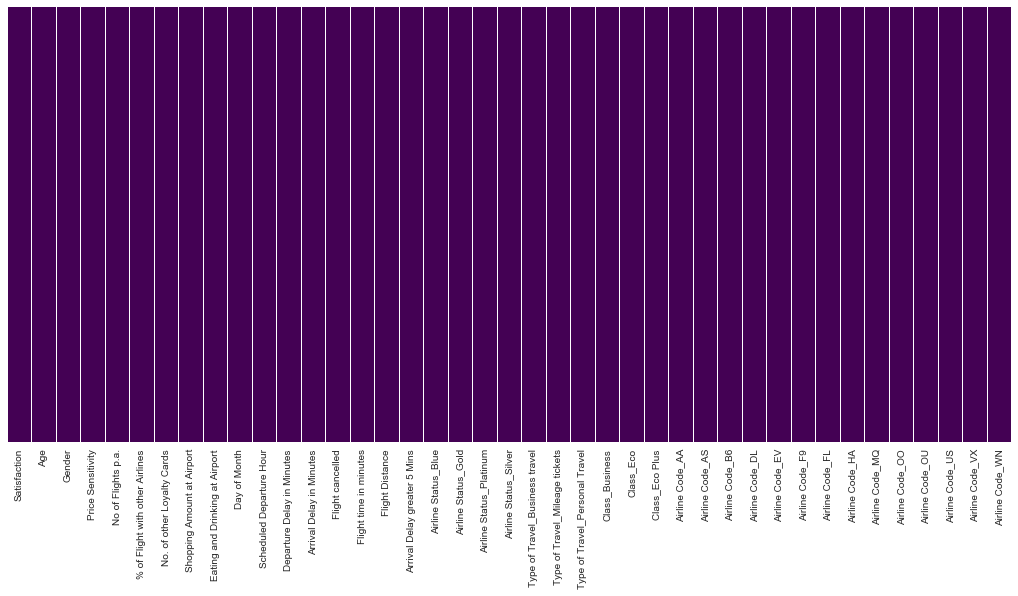

In [10]:
# removing columns that have na values in order to fill them with values from random forest  
features = list(Data.columns)  
features.remove('No of Flights p.a.')  
features.remove('Departure Delay in Minutes')  
features.remove('Arrival Delay in Minutes')  
features.remove('Flight time in minutes')  
  
# Removing na values from number of flight p.a  
X = Data[features]  
y= Data['No of Flights p.a.']  
 
Data_without_flight_pa = Data[pd.isnull(Data['No of Flights p.a.'])]  
Data_with_flight_pa = Data[pd.isnull(Data['No of Flights p.a.']) == False]  
from sklearn.ensemble import RandomForestRegressor  
rfModel_flight_pa = RandomForestRegressor(n_estimators=10)  
rfModel_flight_pa.fit(Data_with_flight_pa[features],Data_with_flight_pa['No of Flights p.a.'])  

generated_flight_pa_values = rfModel_flight_pa.predict(X = Data_without_flight_pa[features])  
  
Data_without_flight_pa['No of Flights p.a.'] = generated_flight_pa_values.astype(float)  
Data_updated1 = Data_with_flight_pa.append(Data_without_flight_pa)  
Data_updated1.reset_index(inplace=True)  
Data_updated1.drop('index',inplace=True,axis=1)

# removing na values in Departure Delay in Minutes  
features = list(Data.columns)  
features.remove('Departure Delay in Minutes')  
features.remove('Arrival Delay in Minutes')  
features.remove('Flight time in minutes')  
 
X = Data_updated1[features]  
y= Data_updated1['Departure Delay in Minutes']  

Data_without_dep_delay = Data_updated1[pd.isnull(Data_updated1['Departure Delay in Minutes'])]  
Data_with_dep_delay = Data_updated1[pd.isnull(Data_updated1['Departure Delay in Minutes']) == False]  
 
rfModel_dep_delay = RandomForestRegressor(n_estimators=10)  
rfModel_dep_delay.fit(Data_with_dep_delay[features],Data_with_dep_delay['Departure Delay in Minutes'])  
generated_dep_delay_values = rfModel_dep_delay.predict(X = Data_without_dep_delay[features])  

Data_without_dep_delay['Departure Delay in Minutes'] = generated_dep_delay_values.astype(float)  
Data_updated2 = Data_with_dep_delay.append(Data_without_dep_delay)  
Data_updated2.reset_index(inplace=True)  
Data_updated2.drop('index',inplace=True,axis=1)  
  
# removing na values in Arrival Delay in Minutes  
features = list(Data.columns)  
features.remove('Arrival Delay in Minutes')  
features.remove('Flight time in minutes')  

X = Data_updated2[features]  
y= Data_updated2['Arrival Delay in Minutes']  
 
Data_without_arrival_delay = Data_updated2[pd.isnull(Data_updated2['Arrival Delay in Minutes'])]  
Data_with_arrival_delay = Data_updated2[pd.isnull(Data_updated2['Arrival Delay in Minutes']) == False]  
  
rfModel_arrival_delay = RandomForestRegressor(n_estimators=10)  
rfModel_arrival_delay.fit(Data_with_arrival_delay[features],Data_with_arrival_delay['Arrival Delay in Minutes'])  
generated_arrival_delay_values = rfModel_arrival_delay.predict(X = Data_without_arrival_delay[features])  

Data_without_arrival_delay['Arrival Delay in Minutes'] = generated_arrival_delay_values.astype(float)  
Data_updated3 = Data_with_arrival_delay.append(Data_without_arrival_delay)  
Data_updated3.reset_index(inplace=True)  
Data_updated3.drop('index',inplace=True,axis=1)  

# removing na values in Flight time in Minutes  
features = list(Data.columns)  
features.remove('Flight time in minutes')  
X = Data_updated3[features]  
y= Data_updated3['Flight time in minutes']  

Data_without_flight_mins = Data_updated3[pd.isnull(Data_updated3['Flight time in minutes'])]  
Data_with_flight_mins = Data_updated3[pd.isnull(Data_updated3['Flight time in minutes']) == False]  
 
rfModel_flight_mins = RandomForestRegressor(n_estimators=10)  
rfModel_flight_mins.fit(Data_with_flight_mins[features],Data_with_flight_mins['Flight time in minutes'])  
generated_flight_mins_values = rfModel_flight_mins.predict(X = Data_without_flight_mins[features])  
  
Data_without_flight_mins['Flight time in minutes'] = generated_flight_mins_values.astype(float)  
Data_updated4 = Data_with_flight_mins.append(Data_without_flight_mins)  
Data_updated4.reset_index(inplace=True)  
Data_updated4.drop('index',inplace=True,axis=1)  
 
len(Data_updated4) - Data_updated4[Data_updated4.columns].count()  
 
# visualising that all na values in columns are filled  
plt.figure(figsize=(18,8))  
sns.heatmap(Data_updated4.isnull(),yticklabels=False,cbar=False,cmap='viridis')  
  



C:\Users\ARORA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix:
 [[ 8797  3893]
 [ 2054 11232]]


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.69      0.75     12690
           1       0.74      0.85      0.79     13286

    accuracy                           0.77     25976
   macro avg       0.78      0.77      0.77     25976
weighted avg       0.78      0.77      0.77     25976

Optimization terminated successfully.
         Current function value: 0.467559
         Iterations 11


C:\Users\ARORA\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\ARORA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\ARORA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\ARORA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                                       Results: Logit
Model:                       Logit                     Pseudo R-squared:          0.325     
Dependent Variable:          Satisfaction              AIC:                       97236.5841
Date:                        2020-11-27 16:01          BIC:                       97589.9793
No. Observations:            103904                    Log-Likelihood:            -48581.   
Df Model:                    36                        LL-Null:                   -71999.   
Df Residuals:                103867                    LLR p-value:               0.0000    
Converged:                   1.0000                    Scale:                     1.0000    
No. Iterations:              11.0000                                                        
--------------------------------------------------------------------------------------------
                                 Coef.    Std.Err.     z     P>|z|     [0.025       0.975]  
----------------

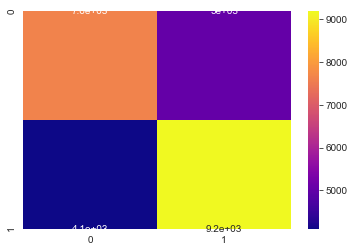

In [11]:
# Doing classification with 2 machine learning techniques  

# logistic regression with all features  
features = list(Data_updated4.columns)  
features.remove('Satisfaction')  
X = Data_updated4[features]  
y= Data_updated4['Satisfaction']  
  
# Split dataset into training set and test set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test  
 
logmodel = LogisticRegression()  
logmodel.fit(X_train,y_train)  
predictions = logmodel.predict(X_test)  
  
print('Confusion Matrix:\n',confusion_matrix(y_test,predictions))  
print('\n')  
  
print('Classification Report:\n',classification_report(y_test,predictions))  
  
import statsmodels.api as sm  
logit_model=sm.Logit(y_train,X_train)  
result=logit_model.fit(solver='liblinear')  
print(result.summary2())  
# nan value represents multi-collinearity  
  
#keeping all the features with significance value <0.05  
features2=['Age', 'Gender', 'Price Sensitivity',  
       'No of Flights p.a.', '% of Flight with other Airlines',  
       'No. of other Loyalty Cards', 'Shopping Amount at Airport',  
       'Scheduled Departure Hour', 'Flight cancelled',  
       'Arrival Delay greater 5 Mins']  
X = Data_updated4[features2]  
y= Data_updated4['Satisfaction']  
# Split dataset into training set and test set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test  
logmodel = LogisticRegression(solver='liblinear')  
logmodel.fit(X_train,y_train)  
predictions = logmodel.predict(X_test)  
  
#import statsmodels.api as sm  
logit_model=sm.Logit(y_train,X_train)  
result=logit_model.fit(solver='liblinear')  
print(result.summary2())  
  
# since the significance value of No. of other Loyalty Cards is greater than 0.05,eliminating this from features  
features3=['Age', 'Gender', 'Price Sensitivity',  
       'No of Flights p.a.', '% of Flight with other Airlines', 'Shopping Amount at Airport',  
       'Scheduled Departure Hour', 'Flight cancelled',  
       'Arrival Delay greater 5 Mins']  
X = Data_updated4[features3]  
y= Data_updated4['Satisfaction']  
# Split dataset into training set and test set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test  
logmodel = LogisticRegression(solver='liblinear')  
logmodel.fit(X_train,y_train)  
predictions = logmodel.predict(X_test)  
  
# MODEL 1 LOGISTIC REGRESSION  
logit_model=sm.Logit(y_train,X_train)  
result=logit_model.fit(solver='liblinear')  
print(result.summary2())  
  
  
print('Classification Report:\n',classification_report(y_test,predictions))  
  
print('Confusion Matrix:\n',confusion_matrix(y_test,predictions))  
print('\n')  
  
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)),annot= True,cmap = 'plasma')  
plt.show()  



Optimization terminated successfully.
         Current function value: 0.627066
         Iterations 5
                                 Results: Logit
Model:                    Logit                Pseudo R-squared:     0.095      
Dependent Variable:       Satisfaction         AIC:                  130327.4315
Date:                     2020-11-27 16:04     BIC:                  130413.3925
No. Observations:         103904               Log-Likelihood:       -65155.    
Df Model:                 8                    LL-Null:              -71999.    
Df Residuals:             103895               LLR p-value:          0.0000     
Converged:                1.0000               Scale:                1.0000     
No. Iterations:           5.0000                                                
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------

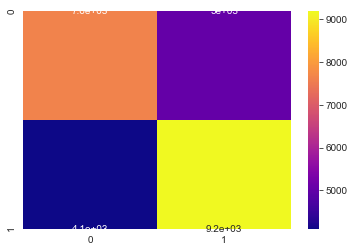

[False  True False False False False False False False False False False
  True False False  True  True False  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False]
[22  1  4 14 24 13 25 28 30 11 26 27  1 29 31  1  1  2  1  1  1  1  1  1
 20 21 17 23  7 19 10  5  9  3 18 15  8 12  6 16]


In [13]:
# Model2 standardising the features   
  
# Standardised logistic regression  
X = Data_updated4[features3]  
  
# Standardizing the features  
X_Standardized= StandardScaler().fit_transform(X)  
  
Standardized_data = pd.DataFrame(data = X_Standardized, columns= features3)  
finalDf = pd.concat([Standardized_data, Data_updated4[['Satisfaction']]], axis = 1)  
  
X_new = finalDf[features3]  
y=finalDf['Satisfaction']  
  
# Split standardized dataset into training set and test set  
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1) # 70% training and 30% test  
  
logmodel = LogisticRegression(solver='liblinear')  
logmodel.fit(X_train,y_train)  
predictions2 = logmodel.predict(X_test)  
  
# This is our improved Logistic regression model with standardising the parameters  
logit_model=sm.Logit(y_train,X_train)  
result=logit_model.fit(solver='liblinear')  
print(result.summary2())  
  
print('Classification Report:\n',classification_report(y_test,predictions2))  
  
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions2)),annot= True,cmap = 'plasma')  
plt.show()  

# GETTING THE ODDS RATIOS  
model2_odds = pd.DataFrame(np.exp(result.params), columns= ['OR'])  
model2_odds  
  
# Recursive Feature Elimination to select all important features( Top 10 in our case) for LOGISTIC REGRESSION classifier  
from sklearn.feature_selection import RFE  
from sklearn.linear_model import LogisticRegression  
logreg = LogisticRegression(solver='liblinear')  
# create the RFE model for the Random classifier   
# and select attributes  
all_features = list(Data_updated4.columns)  
all_features.remove('Satisfaction')  
X = Data_updated4[all_features]  
y= Data_updated4['Satisfaction']  
  
  
rfe = RFE(logreg, 10 )  
rfe = rfe.fit(X, y)  
# print summaries for the selection of attributes  
print(rfe.support_)  
print(rfe.ranking_)  
  
important_features_logistic = [ 'Gender','Flight cancelled', 'Arrival Delay greater 5 Mins',  
 'Airline Status_Blue', 'Airline Status_Platinum','Airline Status_Silver','Type of Travel_Business travel',  
 'Type of Travel_Mileage tickets','Type of Travel_Personal Travel','Class_Business']  


         Current function value: 0.473043
         Iterations: 35


C:\Users\ARORA\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ARORA\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\ARORA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\ARORA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\ARORA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                                Results: Logit
Model:                    Logit                Pseudo R-squared:     0.317     
Dependent Variable:       Satisfaction         AIC:                  98320.0224
Date:                     2020-11-27 16:10     BIC:                  98405.9834
No. Observations:         103904               Log-Likelihood:       -49151.   
Df Model:                 8                    LL-Null:              -71999.   
Df Residuals:             103895               LLR p-value:          0.0000    
Converged:                0.0000               Scale:                1.0000    
No. Iterations:           35.0000                                              
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
Gender                          0.1585   0.0079  20.0266 0.0000  0.1430  

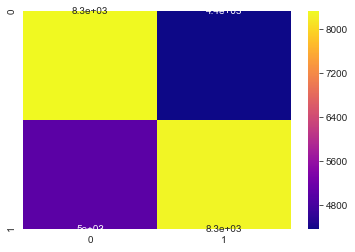

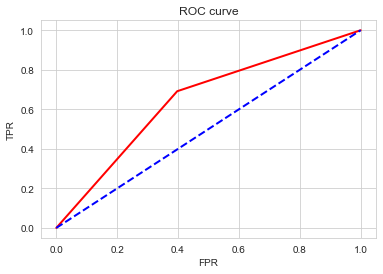

The mean precision score after 10 fold cross validation is: 0.6465172485069512


In [15]:
#Model 3 building  
# Logistic model on the RFE variables  
X = Data_updated4[important_features_logistic]  
  
# Standardizing the features  
X_Standardized= StandardScaler().fit_transform(X)  
  
Standardized_data = pd.DataFrame(data = X_Standardized, columns= important_features_logistic)  
finalDf = pd.concat([Standardized_data, Data_updated4[['Satisfaction']]], axis = 1)  
  
X_new = finalDf[important_features_logistic]  
y=finalDf['Satisfaction']  
  
# Split standardized dataset into training set and test set  
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1) # 80% training and 20% test  
  
logmodel = LogisticRegression(solver='liblinear')  
logmodel.fit(X_train,y_train)  
predictions3 = logmodel.predict(X_test)  
  
# This is our improved Logistic regression model with standardising the parameters  
logit_model=sm.Logit(y_train,X_train)  
result=logit_model.fit(solver='liblinear')  
print(result.summary2())  
# nan value represents multi-collinearity  
  
# After removing insignificant features  
important_features_logistic_updated = ['Gender',  
 'Flight cancelled','Arrival Delay greater 5 Mins','Airline Status_Blue',  
 'Airline Status_Platinum','Airline Status_Silver','Class_Business']  
  
X = Data_updated4[important_features_logistic_updated]  
  
# Standardizing the features  
X_Standardized= StandardScaler().fit_transform(X)  
  
Standardized_data = pd.DataFrame(data = X_Standardized, columns= important_features_logistic_updated)  
finalDf = pd.concat([Standardized_data, Data_updated4[['Satisfaction']]], axis = 1)  
  
X_new = finalDf[important_features_logistic_updated]  
y=finalDf['Satisfaction']  
  
# Split standardized dataset into training set and test set  
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1) # 80% training and 20% test  
  
logmodel = LogisticRegression(solver='liblinear')  
logmodel.fit(X_train,y_train)  
predictions3 = logmodel.predict(X_test)  
  
# This is our improved Logistic regression model with standardising the parameters  
logit_model=sm.Logit(y_train,X_train)  
result=logit_model.fit(solver='liblinear')  
print(result.summary2())  
print('The intercept of this model is:',logmodel.intercept_)  
  
print('Classification Report:\n',classification_report(y_test,predictions3))  
  
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions3)),annot= True,cmap = 'plasma')  
plt.show()  
  
# ROC-AUC curve for the best logistic model i.e model2  
  
fpr, tpr,_=roc_curve(y_test,predictions2,drop_intermediate=False)  
  
import matplotlib.pyplot as plt  
plt.figure()  
##Adding the ROC  
plt.plot(fpr, tpr, color='red',  
 lw=2, label='ROC curve')  
##Random FPR and TPR  
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')  
##Title and label  
plt.xlabel('FPR')  
plt.ylabel('TPR')  
plt.title('ROC curve')  
plt.show()  
  
auc = roc_auc_score(y_test,predictions2)  
auc 

# Cross validation for logistic regression on model2  
import numpy as np  
from sklearn import datasets  
from sklearn import metrics  
from sklearn.model_selection import KFold, cross_val_score  
from sklearn.pipeline import make_pipeline  
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  
  
X = Data_updated4[features3]  
y= Data_updated4['Satisfaction']  
  
# Create standardizer  
standardizer = StandardScaler()  
  
# Create logistic regression  
logit = LogisticRegression()  
  
# Create a pipeline that standardizes, then runs logistic regression  
pipeline = make_pipeline(standardizer, logit)  
  
# Create k-Fold cross-validation  
kf = KFold(n_splits=10, shuffle=True, random_state=1)  
  
# Do k-fold cross-validation  
cv_results = cross_val_score(pipeline, # Pipeline  
                             X, # Feature matrix  
                             y, # Target vector  
                             cv=kf, # Cross-validation technique  
                             scoring="precision",   
                             n_jobs=-1) # Use all CPU scores  
  
# Calculate mean  
print('The mean precision score after 10 fold cross validation is:',cv_results.mean())  


              precision    recall  f1-score   support

           0       0.78      0.73      0.75     12690
           1       0.76      0.81      0.78     13286

    accuracy                           0.77     25976
   macro avg       0.77      0.77      0.77     25976
weighted avg       0.77      0.77      0.77     25976



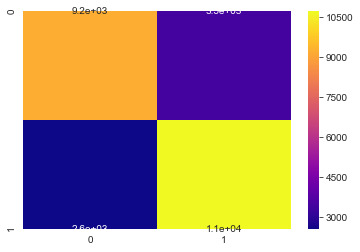

[ True False False  True  True False False  True  True False False  True
 False  True  True False False False False False  True False  True False
 False False False False False False False False False False False False
 False False False False]
[ 1 10  8  1  1  7  5  1  1  2  4  1 28  1  1 11  3 20 27  6  1  9  1 24
 14 21 17 25 23 13 15 29 26 31 22 16 19 18 30 12]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74     12690
           1       0.74      0.77      0.76     13286

    accuracy                           0.75     25976
   macro avg       0.75      0.75      0.75     25976
weighted avg       0.75      0.75      0.75     25976



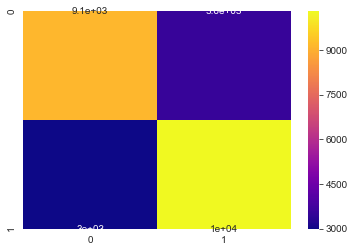

[0.77026825 0.75672565 0.76551522 0.76361316 0.76050597 0.75149993
 0.76310243 0.76998824 0.75967765 0.71573261]


=== Mean Precision Score===
Mean Precision Score - Random Forest:  0.7576629119123919


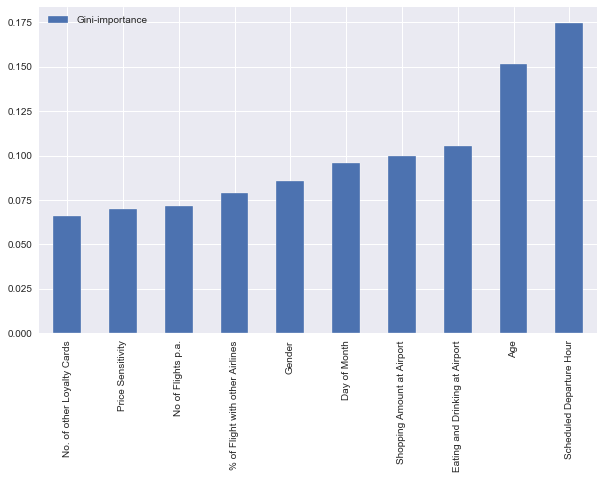

In [16]:
#Model 4 building RANDOM FOREST CLASSIFIER  
features = list(Data_updated4.columns)  
features.remove('Satisfaction')  
X = Data_updated4[features]  
y= Data_updated4.Satisfaction  
  
# Split dataset into training set and test set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test  
  
#Import Random Forest Model  
from sklearn.ensemble import RandomForestClassifier  
  
#Create a Gaussian Classifier  
clf=RandomForestClassifier(n_estimators=10)  
  
#Train the model using the training sets y_pred=clf.predict(X_test)  
clf.fit(X_train,y_train)  
  
predictions4=clf.predict(X_test)  
  
# Model Accuracy, how often is the classifier correct?  
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))  
  
print(classification_report(y_test,predictions4))  
  
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions4)),annot= True,cmap = 'plasma')  
plt.show()  
  
# Using Recursive Feature Elimination to select the important features using RANDOM FOREST CLASSIFIIER  
from sklearn.ensemble import RandomForestClassifier   
from sklearn.feature_selection import RFE  
#creating RandomForest Classifier  object  
clf=RandomForestClassifier(n_estimators=10)  
# create the RFE model for the Random classifier and select attributes  
all_features = list(Data_updated4.columns)  
all_features.remove('Satisfaction')  
X = Data_updated4[all_features]  
y= Data_updated4['Satisfaction']  
  
  
rfe = RFE(clf, 10 )  
rfe = rfe.fit(X, y)  
# print summaries for the selection of attributes  
print(rfe.support_)  
print(rfe.ranking_)  
  
important_variable_random_forest = ['Age','No of Flights p.a.','% of Flight with other Airlines','Eating and Drinking at Airport',  
 'Day of Month', 'Arrival Delay in Minutes','Flight time in minutes',  
 'Flight Distance','Type of Travel_Business travel', 'Type of Travel_Personal Travel']   
  
# Random forest on RFE features  
X = Data_updated4[important_variable_random_forest]  
  
# Standardizing the features  
X_Standardized= StandardScaler().fit_transform(X)  
  
Standardized_data = pd.DataFrame(data = X_Standardized, columns= important_variable_random_forest)  
finalDf = pd.concat([Standardized_data, Data_updated4[['Satisfaction']]], axis = 1)  
  
X_new = finalDf[important_variable_random_forest]  
y=finalDf['Satisfaction']  
  
# Split standardized dataset into training set and test set  
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1) # 80% training and 20% test  
  
#Import Random Forest Model  
from sklearn.ensemble import RandomForestClassifier  
  
#Create a Gaussian Classifier  
clf=RandomForestClassifier(n_estimators=10)  
  
#Train the model using the training sets y_pred=clf.predict(X_test)  
clf.fit(X_train,y_train)  
predictions5=clf.predict(X_test)  
  
print(classification_report(y_test,predictions5))  
  
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions5)),annot= True,cmap = 'plasma')  
plt.show()  
  
# Cross validation for random forest on Model 4  
  
X = Data_updated4[features]  
y= Data_updated4.Satisfaction  
  
from sklearn.model_selection import cross_val_score  
clf_cv_score = cross_val_score(clf, X, y, cv=10, scoring='precision')  
  
print(clf_cv_score)  
print('\n')  
print("=== Mean Precision Score===")  
print("Mean Precision Score - Random Forest: ", clf_cv_score.mean())  
  
plt.style.use('seaborn')  
feats = {}  
for feature, importance in zip(features, clf.feature_importances_):  
    feats[feature] = importance  
      
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})  
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(10, 6))  


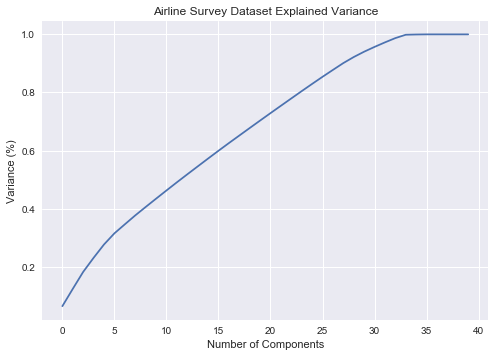

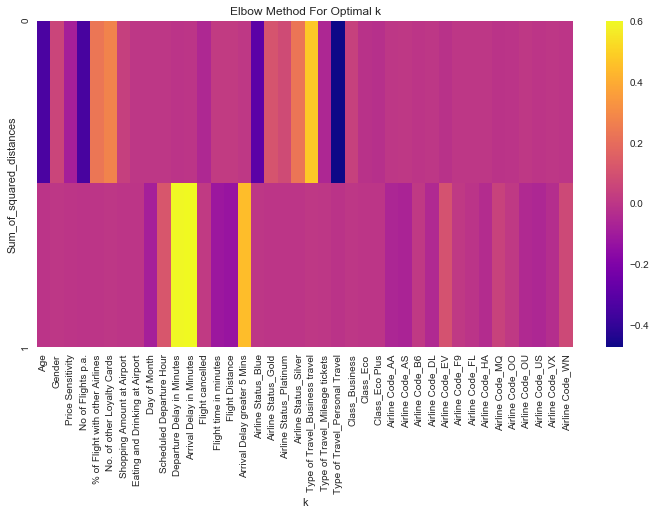

cluster memberships:
[0 1 1 ... 0 1 1]
cluster memberships:
[0 1 1 ... 0 1 1]
cluster memberships:
[2 1 0 ... 2 0 0]
cluster memberships:
[1 3 4 ... 1 0 0]
cluster memberships:
[1 2 4 ... 3 1 1]
cluster memberships:
[1 2 5 ... 6 1 1]
cluster memberships:
[0 6 1 ... 8 0 0]
cluster memberships:
[4 5 1 ... 3 4 9]


0.6747992912857248

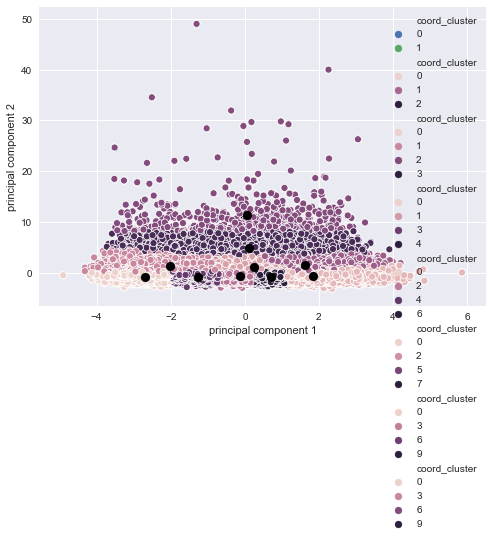

In [19]:
#K-Means clustering  
from sklearn.cluster import KMeans
# for PCA 2 component  
PCA_features = list(Data_updated4.columns)  
PCA_features.remove('Satisfaction')  
X = Data_updated4[PCA_features]  
  
# Standardizing the features  
X_Standardized= StandardScaler().fit_transform(X)  
Standardized_data = pd.DataFrame(data = X_Standardized, columns= PCA_features)  
  
X_new2 = Standardized_data[PCA_features]  
  
#Fitting the PCA algorithm with our Data  
pca = PCA().fit(X_Standardized)  
#Plotting the Cumulative Summation of the Explained Variance  
plt.figure()  
plt.plot(np.cumsum(pca.explained_variance_ratio_))  
plt.xlabel('Number of Components')  
plt.ylabel('Variance (%)') #for each component  
plt.title('Airline Survey Dataset Explained Variance')  
plt.show()  
  
pca = PCA(n_components=2)  
principalComponents = pca.fit_transform(X_new2)  
principalDf2 = pd.DataFrame(data = principalComponents  
             , columns = ['principal component 1','principal component 2'])  
  
df_comp = pd.DataFrame(pca.components_,columns=PCA_features)  
  
plt.figure(figsize=(12,6))  
sns.heatmap(df_comp,cmap='plasma')  
  
# Finding the value of K by elbow method for PCA data  
  
Sum_of_squared_distances = []  
K = range(1,15)  
for k in K:  
    km = KMeans(n_clusters=k)  
    km = km.fit(X_Standardized)  
    Sum_of_squared_distances.append(km.inertia_)  
      
      
plt.plot(K, Sum_of_squared_distances, 'bx-')  
plt.xlabel('k')  
plt.ylabel('Sum_of_squared_distances')  
plt.title('Elbow Method For Optimal k')  
plt.show()  
  
sns.scatterplot(x='principal component 1',y='principal component 2',data = principalDf2)  
  
# Performing k-means clustering on the PCA components  
kmeans = KMeans(n_clusters=2)  
kmeans.fit(principalDf2)  
print("cluster memberships:\n{}".format(kmeans.labels_[:]))  
coord_cluster = kmeans.labels_  
labels2 = kmeans.fit_predict(principalDf2)  
centers = kmeans.cluster_centers_  
principalDf2['coord_cluster'] = coord_cluster  
  
principalDf2.columns  
sns.scatterplot(x='principal component 1',y='principal component 2',data = principalDf2,hue='coord_cluster')  
plt.scatter(centers[:,0],centers[:,1],c='black',s=200)  
  
# scoore for k=2  
from sklearn.metrics import silhouette_samples,silhouette_score  
silh_val = silhouette_samples(principalDf2,labels2)  
avg_score = np.mean(silh_val)  
avg_score  
  
# Performing k-means clustering on the PCA components  
kmeans = KMeans(n_clusters=3)  
kmeans.fit(principalDf2)  
print("cluster memberships:\n{}".format(kmeans.labels_[:]))  
coord_cluster = kmeans.labels_  
labels = kmeans.fit_predict(principalDf2)  
centers = kmeans.cluster_centers_  
principalDf2['coord_cluster'] = coord_cluster  
  
principalDf2.columns  
sns.scatterplot(x='principal component 1',y='principal component 2',data = principalDf2,hue='coord_cluster')  
plt.scatter(centers[:,0],centers[:,1],c='black',s=200)  
  
from sklearn.metrics import silhouette_samples,silhouette_score  
silh_val = silhouette_samples(principalDf2,labels)  
avg_score3 = np.mean(silh_val)  
avg_score3  
  
# Performing k-means clustering on the PCA components  
kmeans = KMeans(n_clusters=4)  
kmeans.fit(principalDf2)  
print("cluster memberships:\n{}".format(kmeans.labels_[:]))  
coord_cluster = kmeans.labels_  
labels4 = kmeans.fit_predict(principalDf2)  
centers = kmeans.cluster_centers_  
principalDf2['coord_cluster'] = coord_cluster  
  
principalDf2.columns  
sns.scatterplot(x='principal component 1',y='principal component 2',data = principalDf2,hue='coord_cluster')  
plt.scatter(centers[:,0],centers[:,1],c='black',s=200)  
  
from sklearn.metrics import silhouette_samples,silhouette_score  
silh_val = silhouette_samples(principalDf2,labels4)  
avg_score4 = np.mean(silh_val)  
avg_score4  
  
# Performing k-means clustering on the PCA components  
kmeans = KMeans(n_clusters=5)  
kmeans.fit(principalDf2)  
print("cluster memberships:\n{}".format(kmeans.labels_[:]))  
coord_cluster = kmeans.labels_  
centers = kmeans.cluster_centers_  
labels5 = kmeans.fit_predict(principalDf2)  
principalDf2['coord_cluster'] = coord_cluster  
  
principalDf2.columns  
sns.scatterplot(x='principal component 1',y='principal component 2',data = principalDf2,hue='coord_cluster')  
plt.scatter(centers[:,0],centers[:,1],c='black',s=200)  
  
from sklearn.metrics import silhouette_samples,silhouette_score  
silh_val = silhouette_samples(principalDf2,labels5)  
avg_score5 = np.mean(silh_val)  
avg_score5  
  
# Performing k-means clustering on the PCA components  
kmeans = KMeans(n_clusters=6)  
kmeans.fit(principalDf2)  
print("cluster memberships:\n{}".format(kmeans.labels_[:]))  
coord_cluster = kmeans.labels_  
centers = kmeans.cluster_centers_  
labels6 = kmeans.fit_predict(principalDf2)  
principalDf2['coord_cluster'] = coord_cluster  
  
principalDf2.columns  
sns.scatterplot(x='principal component 1',y='principal component 2',data = principalDf2,hue='coord_cluster')  
plt.scatter(centers[:,0],centers[:,1],c='black',s=200)  
  
from sklearn.metrics import silhouette_samples,silhouette_score  
silh_val = silhouette_samples(principalDf2,labels6)  
avg_score6 = np.mean(silh_val)  
avg_score6  
  
# Performing k-means clustering on the PCA components  
kmeans = KMeans(n_clusters=8)  
kmeans.fit(principalDf2)  
print("cluster memberships:\n{}".format(kmeans.labels_[:]))  
coord_cluster = kmeans.labels_  
centers = kmeans.cluster_centers_  
labels6 = kmeans.fit_predict(principalDf2)  
principalDf2['coord_cluster'] = coord_cluster  
  
principalDf2.columns  
sns.scatterplot(x='principal component 1',y='principal component 2',data = principalDf2,hue='coord_cluster')  
plt.scatter(centers[:,0],centers[:,1],c='black',s=200)  
  
from sklearn.metrics import silhouette_samples,silhouette_score  
silh_val = silhouette_samples(principalDf2,labels6)  
avg_score6 = np.mean(silh_val)  
avg_score6  
  
# Performing k-means clustering on the PCA components  
kmeans = KMeans(n_clusters=9)  
kmeans.fit(principalDf2)  
print("cluster memberships:\n{}".format(kmeans.labels_[:]))  
coord_cluster = kmeans.labels_  
centers = kmeans.cluster_centers_  
labels10 = kmeans.fit_predict(principalDf2)  
principalDf2['coord_cluster'] = coord_cluster  
  
principalDf2.columns  
sns.scatterplot(x='principal component 1',y='principal component 2',data = principalDf2,hue='coord_cluster')  
plt.scatter(centers[:,0],centers[:,1],c='black',s=100)  
  
from sklearn.metrics import silhouette_samples,silhouette_score  
silh_val = silhouette_samples(principalDf2,labels10)  
avg_score9 = np.mean(silh_val)  
avg_score9  
  
# Performing k-means clustering on the PCA components  
kmeans = KMeans(n_clusters=10)  
kmeans.fit(principalDf2)  
print("cluster memberships:\n{}".format(kmeans.labels_[:]))  
coord_cluster = kmeans.labels_  
centers = kmeans.cluster_centers_  
labels10 = kmeans.fit_predict(principalDf2)  
principalDf2['coord_cluster'] = coord_cluster  
  
principalDf2.columns  
sns.scatterplot(x='principal component 1',y='principal component 2',data = principalDf2,hue='coord_cluster')  
plt.scatter(centers[:,0],centers[:,1],c='black',s=80)  
  
from sklearn.metrics import silhouette_samples,silhouette_score  
silh_val = silhouette_samples(principalDf2,labels10)  
avg_score10 = np.mean(silh_val)  
avg_score10 

